# League Of Legends

In [4]:
from IPython.display import Video
Video('LoL/What is League of Legends_.mp4',width=900,height=500)

<pre style="font-weight:bold;color:#0066ff;">
League Of Legends This is a game about 5-champion versus 5-champion that needs to destroying the rival team’s nexus.
At this Notebook I am going to build 4 Classification models for predict which group will win (Blue Or Red) using 
some parameters, that I will choose by heatmap.
As alot of people tried to predict LOL WIN in this I will concentrate on Which model will be best,
and How can I explain the diffrence between the models.
</pre>


## A. DATA VIEW

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import json
%matplotlib inline
sns.set()
! pip install pygal

In [6]:
df = pd.read_csv("LoL/games.csv")

In [26]:
df.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,Fiora,Vayne,Karma,Soraka,Caitlyn
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,Camille,Tristana,Kayn,Janna,Caitlyn
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,Garen,Master Yi,Braum,Darius,Tristana


In [38]:
len(df.gameId.unique())
df.winner == 0
df.winner == 1

0        False
1        False
2        False
3        False
4        False
         ...  
51485    False
51486    False
51487    False
51488    False
51489    False
Name: winner, Length: 51490, dtype: bool

In [18]:
df.shape

(51490, 61)

In [19]:
ChampName = pd.read_json('LoL/champion_info_2.json')
ChampName = pd.read_json((ChampName['data']).to_json(), orient='index')
ChampName.set_index(['id'], inplace=True)
ChampName.head()

,tags,title,key,name
id,,,,
266,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox
103,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri,Ahri
84,[Assassin],the Fist of Shadow,Akali,Akali
12,"[Tank, Support]",the Minotaur,Alistar,Alistar
32,"[Tank, Mage]",the Sad Mummy,Amumu,Amumu


In [20]:
Spell = pd.read_json('LoL/summoner_spell_info.json')
Spell = pd.read_json((Spell['data']).to_json(),orient='index')
Spell.head(5)


,id,summonerLevel,name,key,description
1,1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."


In [21]:
def idToName(ID, dic):
    '''
    ID: champion ID as listed in original dataframe
    dic: champInfo from json, defined above

    used to convert ID's to champion names
    '''
    champ = dic['name'][ID]
    return champ

def getTag(name, data):
    '''
    name: champion name as listed in dataframe
    data: champInfo

    used to get primary tag from champInfo
    '''
    tags = data['tags'][name][0]
    return tags

def numToColor(data):
    '''
    data: main dataframe

    used to get color of team from 0 or 1
    '''
    if data == 0:
        color = 'blue'
    else:
        color = 'red'
    return color

In [22]:
Champs = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
Bans = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]
SpellC = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2',
                 't1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                 't2_champ5_sum1','t2_champ5_sum2']


In [23]:
for c in Champs:
     df[c] = df[c].apply(lambda x: idToName(x, ChampName))

for c in Bans:
    df[c] = df[c].apply(lambda x: idToName(x, ChampName)) 

for c in SpellC:
    df[c] = df[c].apply(lambda x: idToName(x, Spell))

In [53]:
df[Champs]

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn
...,...,...,...,...,...,...,...,...,...,...
51485,Warwick,Kalista,Talon,Bard,Lee Sin,Veigar,Yorick,Vayne,Janna,Gragas
51486,Malzahar,Amumu,Cho'Gath,Thresh,Tristana,Shyvana,Kalista,Leona,Nasus,Veigar
51487,Kayn,Tristana,Bard,Ezreal,Rumble,Annie,Draven,Rammus,Karma,Lux
51488,Kha'Zix,Lucian,Illaoi,Braum,Lux,Miss Fortune,Nocturne,Morgana,Karthus,Master Yi


In [54]:
df[Bans]

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana
...,...,...,...,...,...,...,...,...,...,...
51485,Fiora,Tristana,Master Yi,Yasuo,Rakan,Katarina,None,Malzahar,Zed,Yasuo
51486,Yasuo,Camille,Darius,Lux,Illaoi,Yasuo,Katarina,Draven,Zac,Fizz
51487,Zed,Cho'Gath,Jax,Blitzcrank,Master Yi,Sejuani,Darius,Blitzcrank,Master Yi,Yasuo
51488,Draven,Lee Sin,Caitlyn,Yasuo,Twitch,Zac,Irelia,Caitlyn,Malzahar,Fiora


In [55]:
df[SpellC]

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust
1,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,Flash,Teleport,Flash,Ignite,Smite,Flash,Flash,Ignite,Flash,Heal
2,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,Flash,Heal,Ignite,Flash,Flash,Teleport,Flash,Smite,Heal,Flash
3,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,Ignite,Flash,Smite,Flash,Flash,Exhaust,Flash,Ignite,Flash,Heal
4,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,Exhaust,Flash,Flash,Teleport,Smite,Flash,Flash,Teleport,Flash,Heal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,Teleport,Flash,Flash,Heal,Flash,Ignite,Flash,Ignite,Flash,Smite,Teleport,Flash,Teleport,Flash,Flash,Heal,Exhaust,Flash,Smite,Flash
51486,Flash,Ignite,Flash,Smite,Teleport,Flash,Ignite,Flash,Flash,Heal,Smite,Flash,Heal,Flash,Exhaust,Flash,Flash,Teleport,Ignite,Flash
51487,Smite,Flash,Heal,Flash,Exhaust,Flash,Teleport,Flash,Flash,Teleport,Flash,Teleport,Heal,Flash,Smite,Flash,Teleport,Flash,Ignite,Flash
51488,Smite,Flash,Flash,Heal,Flash,Teleport,Flash,Exhaust,Flash,Ignite,Heal,Flash,Flash,Teleport,Flash,Ignite,Teleport,Flash,Smite,Flash


## B. Data Visualization

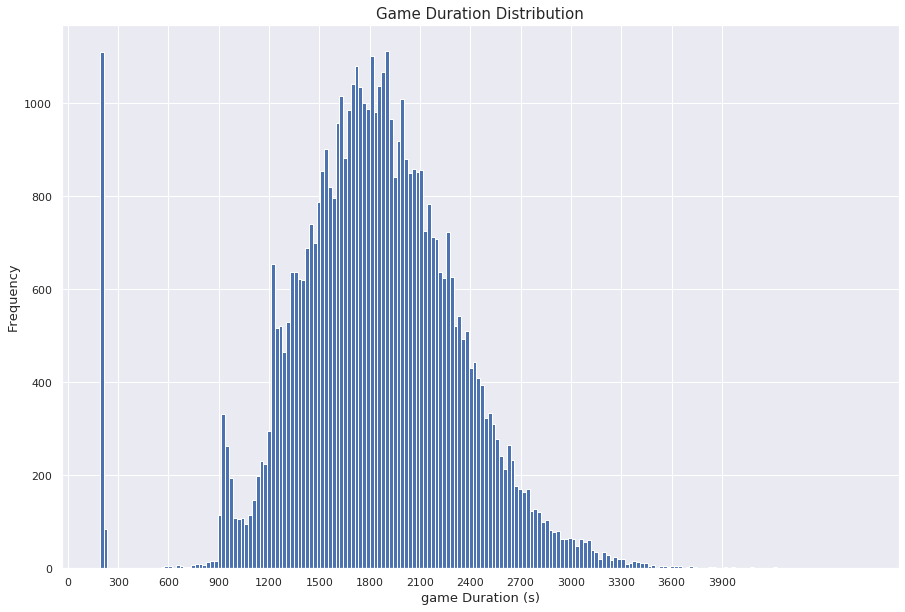

In [75]:
plt.figure(figsize = (15, 10))
Duration_plot = plt.hist(df['gameDuration'], bins = 200)
my_x_ticks = np.arange(0, 4200, 300)
plt.xticks(my_x_ticks)
plt.xlabel("game Duration (s)", fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.title('Game Duration Distribution', fontsize = 15)
plt.show()


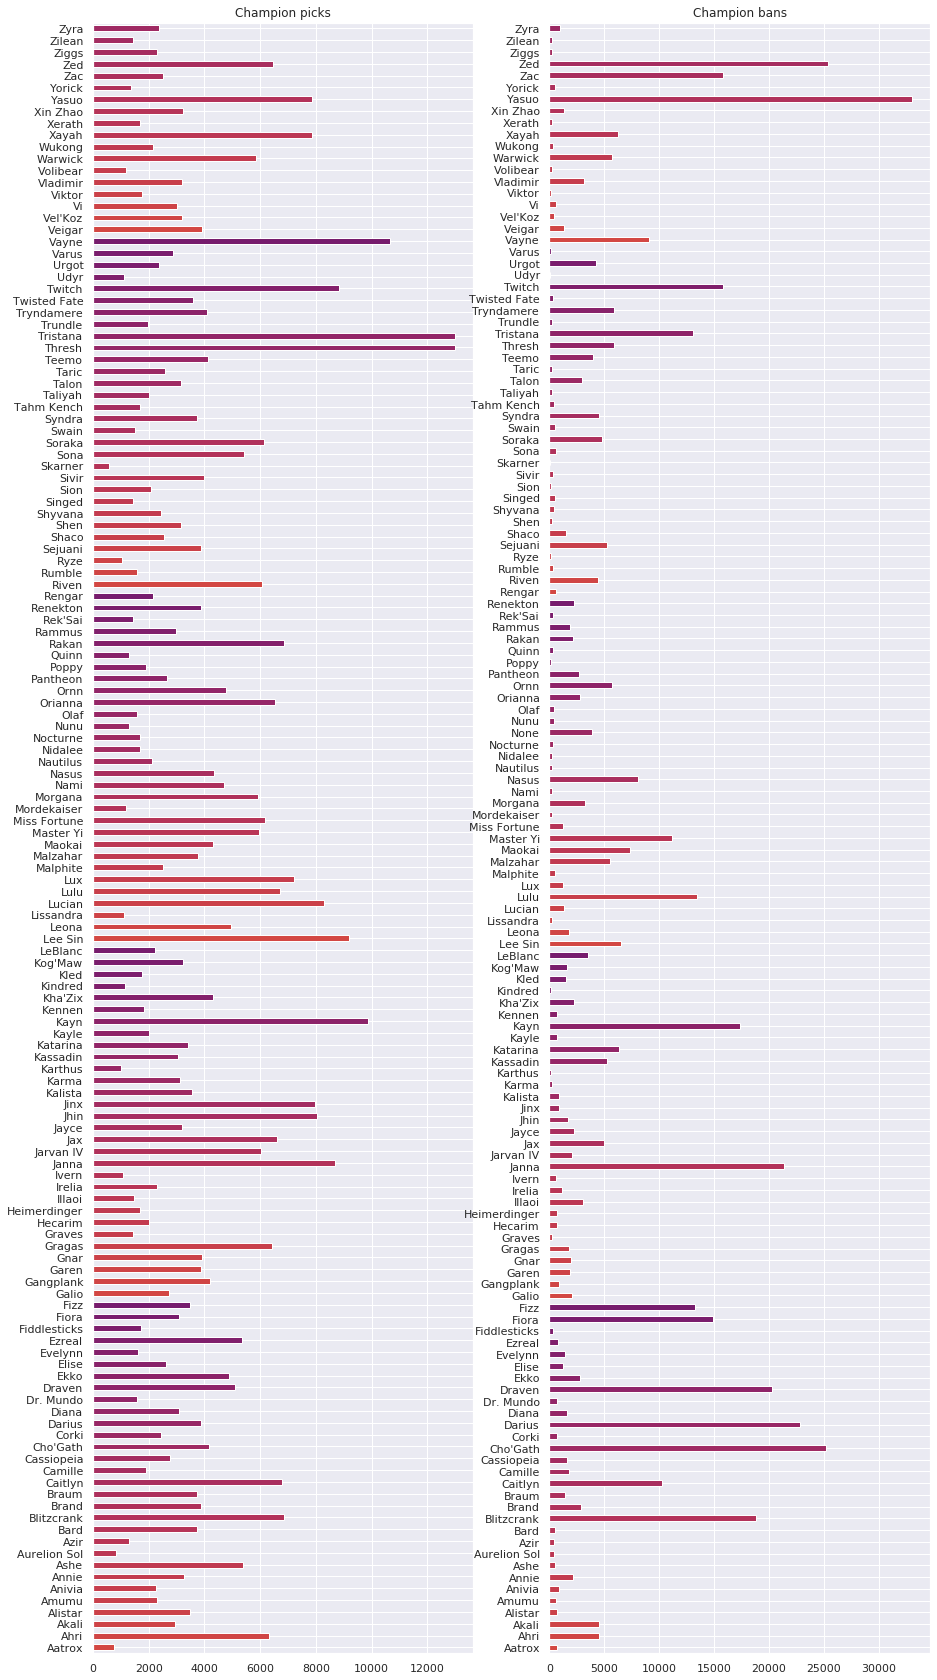

In [57]:
chams = df['t1_champ1id'].value_counts()+df['t1_champ2id'].value_counts()+df['t1_champ3id'].value_counts()+df['t1_champ4id'].value_counts()+df['t1_champ5id'].value_counts()+df['t2_champ1id'].value_counts()+df['t2_champ2id'].value_counts()+df['t2_champ3id'].value_counts()+df['t2_champ4id'].value_counts()+df['t2_champ5id'].value_counts()
bans = df['t1_ban1'].value_counts()+df['t1_ban2'].value_counts()+df['t1_ban3'].value_counts()+df['t1_ban4'].value_counts()+df['t1_ban5'].value_counts()+df['t2_ban1'].value_counts()+df['t2_ban2'].value_counts()+df['t2_ban3'].value_counts()+df['t2_ban4'].value_counts()+df['t2_ban5'].value_counts()

from matplotlib import cm
color = cm.inferno_r(np.linspace(0.43,0.67, 30))
color
plt.figure(1,figsize=(15,30))
plt.subplot(121)
chams.plot(kind='barh',color=color,title="Champion picks")
plt.subplot(122)
bans.plot(kind='barh',color=color,title="Champion bans")
plt.show()

In [58]:
spellChoosing = df[SpellC].apply(pd.value_counts)
spellChoosing['count'] = spellChoosing[SpellC].sum(axis=1)
spellChoosing

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,...,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,count
Barrier,702,890,649,814,620,852,630,834,648,814,...,881,637,887,617,823,634,838,625,804,14880
Cleanse,160,199,151,153,135,168,136,134,125,182,...,190,129,159,136,182,154,181,149,184,3154
Exhaust,3640,4394,3904,4614,3928,4738,3992,4723,3763,4557,...,4459,3912,4596,3928,4704,3855,4717,3885,4511,84576
Flash,28164,22216,27998,22490,28019,22397,27988,22393,27966,22377,...,22204,28037,22427,28170,22255,28089,22322,27838,22589,504121
Ghost,744,798,678,706,647,750,664,689,720,800,...,761,715,706,690,712,672,737,665,711,14305
Heal,4581,5758,4922,6309,4902,6180,4971,6136,4500,5826,...,5934,4854,6197,4834,6173,4896,6276,4571,5746,108043
Ignite,3820,5205,3832,4930,3786,4894,3777,4982,3917,5093,...,5047,3823,4875,3758,4980,3715,4899,3956,5032,88258
Smite,4711,5635,4780,5520,4789,5511,4681,5579,4768,5550,...,5656,4690,5558,4621,5594,4894,5594,4777,5563,103062
Teleport,4968,6395,4576,5954,4664,6000,4651,6020,5083,6291,...,6358,4693,6085,4736,6067,4581,5926,5024,6350,109401


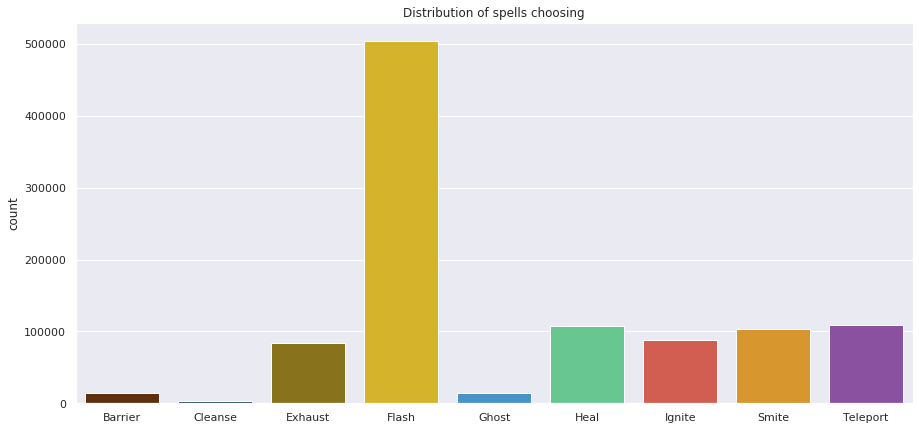

In [59]:
spellColors = ["#6E2C00","#1A5276","#9A7D0A","#F1C40F","#3498DB","#58D68D","#E74C3C","#F39C12","#8E44AD"]
fig = plt.figure(figsize=(15,7))
sns.barplot(x=spellChoosing.index,y=spellChoosing['count'],palette=spellColors).set_title('Distribution of spells choosing')
plt.show()

In [60]:
dataClean = df.replace([0,1,2],['neither','blue','red'])
dataClean.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,blue,red,blue,blue,blue,blue,...,5,neither,neither,blue,blue,Fiora,Vayne,Karma,Soraka,Caitlyn
1,3229566029,1497848803862,1851,9,blue,blue,blue,blue,neither,blue,...,red,neither,neither,neither,neither,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,3327363504,1504360103310,1493,9,blue,red,blue,blue,blue,red,...,red,neither,neither,blue,neither,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,3326856598,1504348503996,1758,9,blue,blue,blue,blue,blue,blue,...,neither,neither,neither,neither,neither,Camille,Tristana,Kayn,Janna,Caitlyn
4,3330080762,1504554410899,2094,9,blue,red,blue,blue,blue,blue,...,3,neither,neither,blue,neither,Garen,Master Yi,Braum,Darius,Tristana


In [61]:
firsts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
firstTotals = dataClean[firsts].apply(pd.value_counts)
newIndex = ['blue','red','neither']
firstSort = firstTotals.reindex(index=newIndex)
firstSort

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
blue,26113,25861,23054,14758,24690,12948
red,24822,24416,22160,16474,24800,12363
neither,555,1213,6276,20258,2000,26179


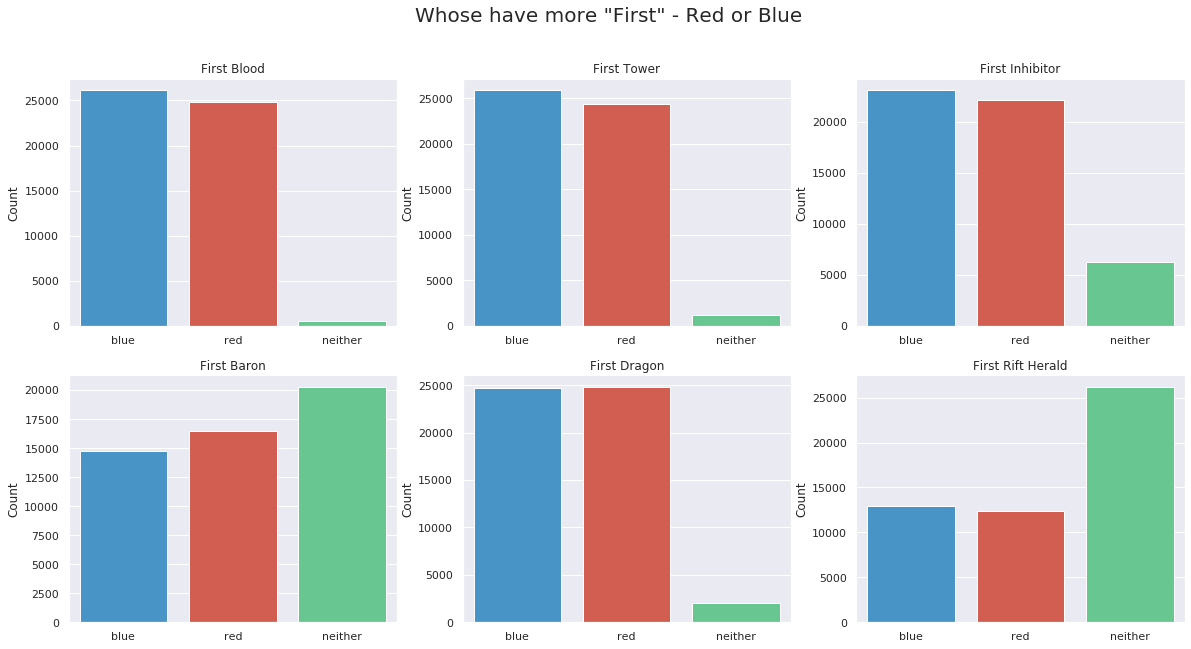

In [62]:
pcolors = ["#3498DB","#E74C3C","#58D68D"]
Titles = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
nrows, ncols = 2,3
fig = plt.figure(figsize=(20,10))
fig.suptitle('Whose have more "First" - Red or Blue', fontsize=20)
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstSort.index,y=firstSort[firstSort.columns[i-1]],palette=pcolors)
    ax.set_ylabel('Count')
    ax.set_title(Titles[i-1])

## c. Data Cleanning

In [63]:
print("Total Null on df data is -",df.isnull().sum().sum())

Total Null on df data is - 0


In [64]:
specific = df[['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon'
         , 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills'
         , 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
#### מוותרים על כל הבאנים ועל ה-spells, בהנחה שהם אינם חשובים.

In [65]:
specific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 18 columns):
gameDuration          51490 non-null int64
winner                51490 non-null int64
firstBlood            51490 non-null int64
firstTower            51490 non-null int64
firstInhibitor        51490 non-null int64
firstBaron            51490 non-null int64
firstDragon           51490 non-null int64
firstRiftHerald       51490 non-null int64
t1_towerKills         51490 non-null int64
t1_inhibitorKills     51490 non-null int64
t1_baronKills         51490 non-null int64
t1_dragonKills        51490 non-null int64
t1_riftHeraldKills    51490 non-null int64
t2_towerKills         51490 non-null int64
t2_inhibitorKills     51490 non-null int64
t2_baronKills         51490 non-null int64
t2_dragonKills        51490 non-null int64
t2_riftHeraldKills    51490 non-null int64
dtypes: int64(18)
memory usage: 7.1 MB


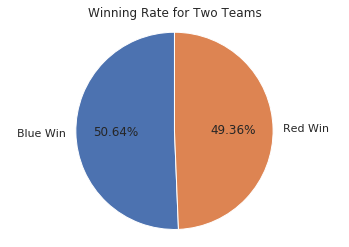

In [66]:
n = specific.count()
Team1_win = specific[specific['winner'] == 1].count()
Team2_win = specific[specific['winner'] == 2].count()
Team1_win_percent = Team1_win/n * 100
Team2_win_percent = Team2_win/n * 100
T1 = Team1_win_percent['winner']
T2 = Team2_win_percent['winner']
plt.pie((T1,T2), labels = ('Blue Win', 'Red Win'), startangle = 90, autopct='%.2f%%')
plt.axis('equal')
plt.title('Winning Rate for Two Teams')
plt.show()


In [67]:
#Sklearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer

## D. Model

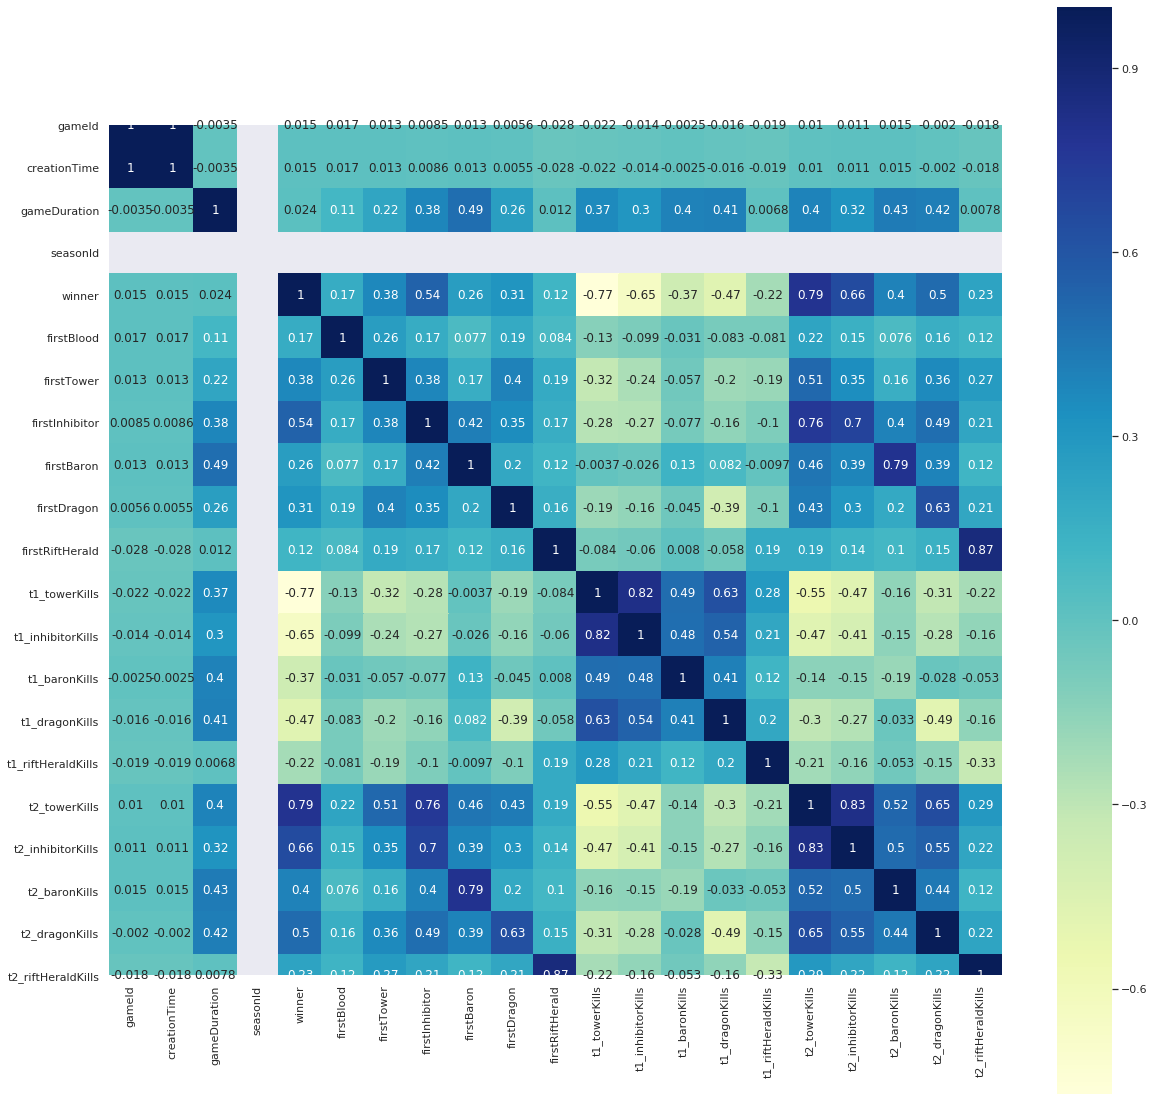

In [76]:
#### Heatmap to check what will be strong variable in the predict

fig = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,square=True,cmap="YlGnBu")
plt.show()

<pre>
Creation Time: 0.015 (Moderate/Weak correlation)
GameDuration: 0.024 (Moderate/Weak correlation)
FirstBlood:0.17 (Moderate/Weak correlation)
First Tower:0.38 (Moderate/Weak correlation)
First Inhibitor:0.54 (Moderate correlation)
First Dragon:0.31 (Moderate/Weak correlation)
First Rift:0.12 (Moderate/Weak correlation)
<b>TOWER KILLS: 0.78 (Strong/Moderate correlation)</b>
<b>INHIBITOR KILLS:0.655 (Strong/Moderate correlation)</b>
<b>BARON KILLS:0.37 (Moderate/Weak correlation)</b>
<b>DRAGON KILLS:0.485 (Moderate correlation)</b>
RIFT KILLS:0.225 (Moderate/Weak correlation)

I chose just the bolds accordding to there influencing, and skipped First Inhibitor in order to prevent overfitting.
</pre>

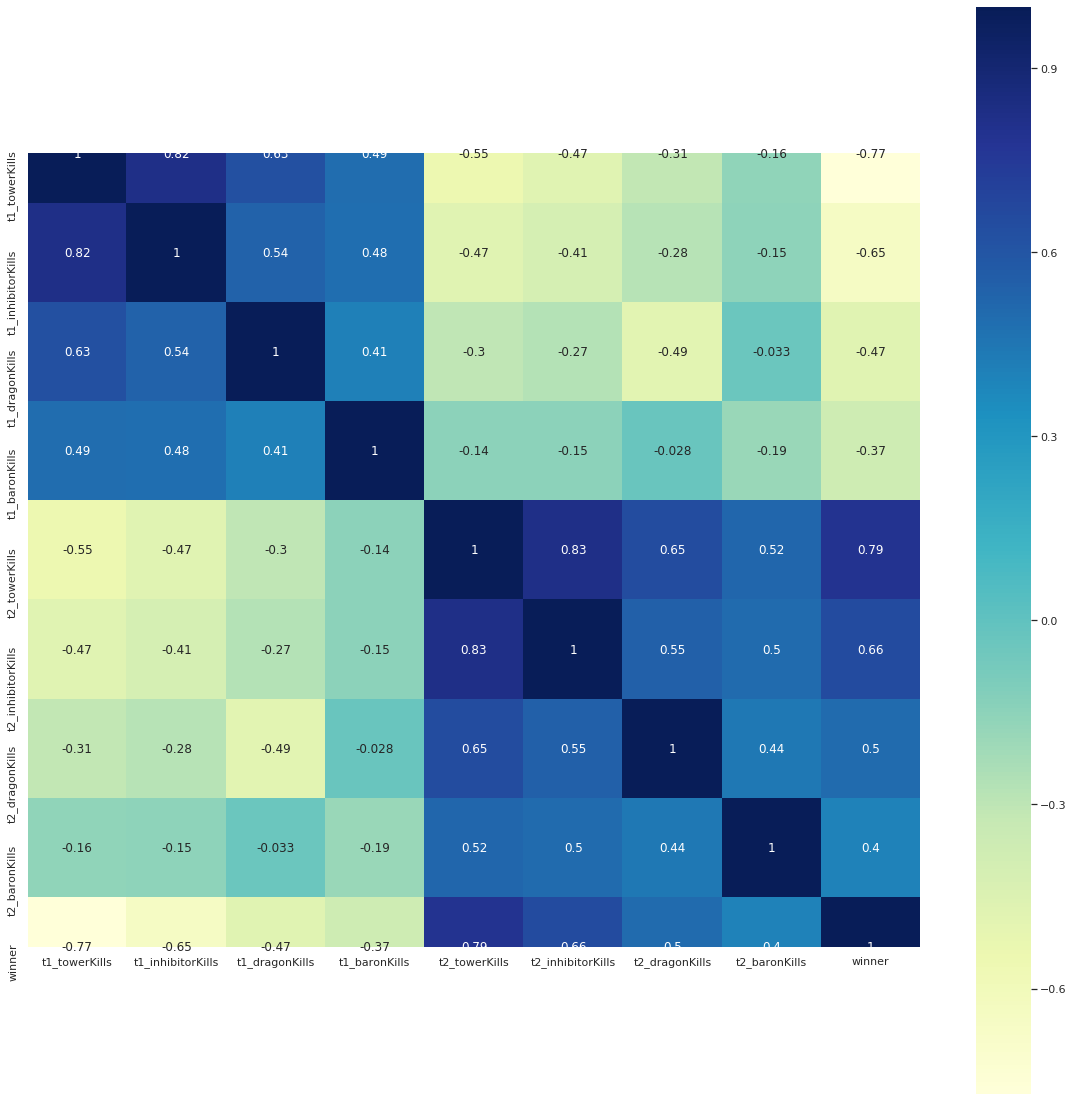

In [68]:
#### Heatmap to check what will be strong variable in the predict

fig = plt.figure(figsize=(20,20))
sns.heatmap(df[['t1_towerKills','t1_inhibitorKills','t1_dragonKills','t1_baronKills',
                  't2_towerKills','t2_inhibitorKills','t2_dragonKills','t2_baronKills','winner']].corr(),annot=True,square=True,cmap="YlGnBu")
plt.show()

<pre>
Tower Kills: ~.78 (Strong correlation)
Inhibitor Kills: ~.65 (Strong/Moderate correlation)
Dragon Kills: ~.49 (Moderate correlation)
Baron Kills: ~.40 (Moderate/Weak correlation)
</pre>

### Model CLASS

In [77]:
def logRegModel(X, y):
    # Split the data (X, Y)
    from sklearn import metrics
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    # Create and train model
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)

    # Evaluate the model
    cfm = metrics.confusion_matrix(y_test, predictions)
    sns.heatmap(cfm, annot=True)
    print(classification_report(y_test, predictions))
    
    
def SVMModel(x, y):
    # Split the data (X, Y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    
    # Create and train model
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    
    # Evaluate the model
    from sklearn.metrics import classification_report, confusion_matrix
    cfm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cfm, annot=True)
    print(classification_report(y_test,y_pred))
    
def knn(x, y):
    # Split the data (X, Y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    
    # Create and train model
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    from sklearn.metrics import classification_report, confusion_matrix
    cfm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cfm, annot=True)
    print(classification_report(y_test, y_pred))

def tree(x,y):
    # Split the data (X, Y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    
    # Create and train model
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [70]:
X = df[['t1_baronKills', 't1_dragonKills', 't2_baronKills', 't2_dragonKills',
         't1_towerKills','t1_inhibitorKills','t2_towerKills','t2_inhibitorKills']]
Y = df['winner']

/home/ravid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.95      0.97      0.96      5119
           2       0.97      0.95      0.96      5179

    accuracy                           0.96     10298
   macro avg       0.96      0.96      0.96     10298
weighted avg       0.96      0.96      0.96     10298



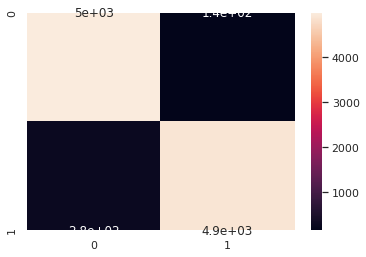

In [71]:
logRegModel(X, Y)


              precision    recall  f1-score   support

           1       0.97      0.95      0.96      5241
           2       0.95      0.97      0.96      5057

    accuracy                           0.96     10298
   macro avg       0.96      0.96      0.96     10298
weighted avg       0.96      0.96      0.96     10298



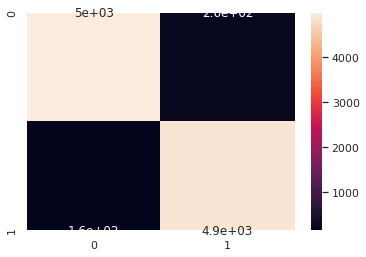

In [72]:
SVMModel(X, Y)

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      5201
           2       0.95      0.97      0.96      5097

    accuracy                           0.96     10298
   macro avg       0.96      0.96      0.96     10298
weighted avg       0.96      0.96      0.96     10298



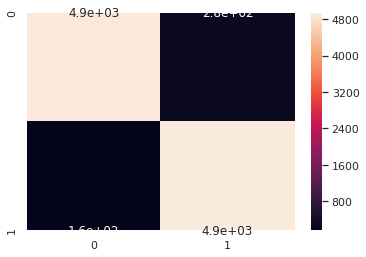

In [73]:
knn(X, Y)

In [74]:
tree(X,Y)

[[4981  168]
 [ 311 4838]]
              precision    recall  f1-score   support

           1       0.94      0.97      0.95      5149
           2       0.97      0.94      0.95      5149

    accuracy                           0.95     10298
   macro avg       0.95      0.95      0.95     10298
weighted avg       0.95      0.95      0.95     10298



### How to read the confusion matrix?

<img src="https://www.simplypsychology.org/type-1-and-2-errors.jpg?ezimgfmt=rs:555x410/rscb18/ng:webp/ngcb18" />

<img src="https://lh6.googleusercontent.com/yhbCKml74dnMDgZObLGn7xDY-KCoRNuMM6ElEAVIoprceJZaJ6vOOv3XHvN_-xjvwvUYs41CC5ElwvFf9fbvWNJQImsW5bSWTkQr4qbWghcup06x4I5red1BhcZQSpOXGD6VeRT4" />

<img src="https://miro.medium.com/max/1428/0*6xDHY76Pf-Fshlih.jpg" />